<a href="https://colab.research.google.com/github/Adheena-Ajayghosh/Assignments/blob/main/Assignment%2012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Perceptron and Gradient Descent
## Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

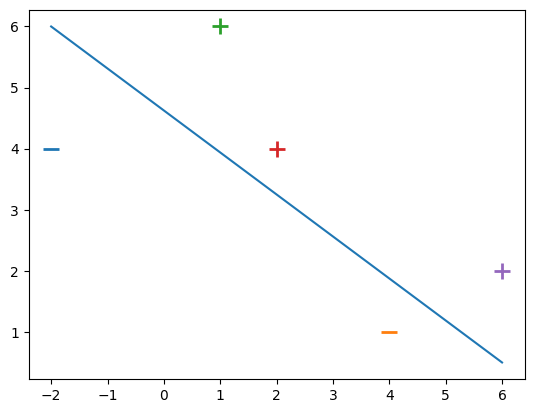

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

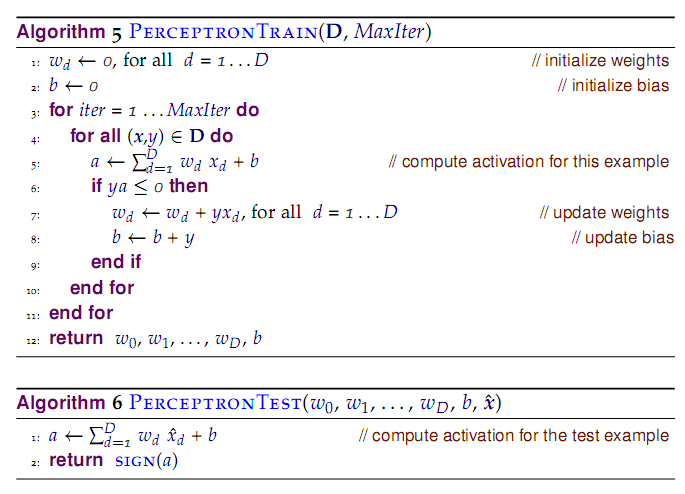

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

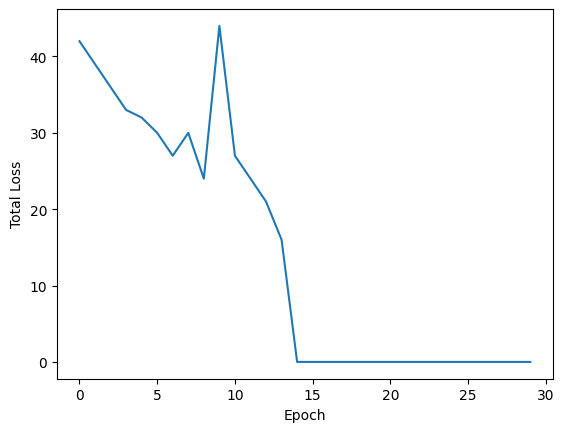

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

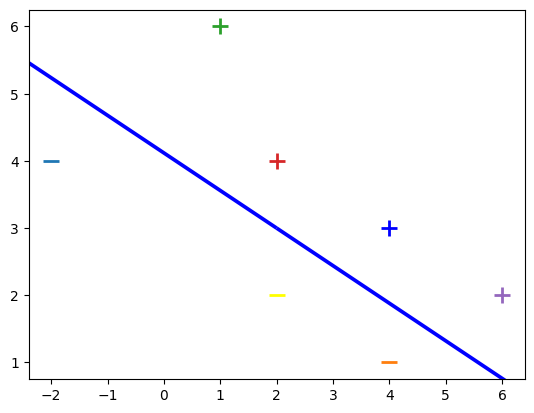

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.

2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

3. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

4. In the perceptron learning algorithm, explain the purpose of the bias term added to each data sample. How does the bias term influence the decision boundary and the overall classification process?

5. In the perceptron_algo_plot function, the total loss is computed and plotted for each epoch during training. How does the behavior of the loss plot change as you increase or decrease the learning rate (η)? Discuss the trade-offs between using a larger or smaller learning rate in terms of convergence speed and stability.


In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


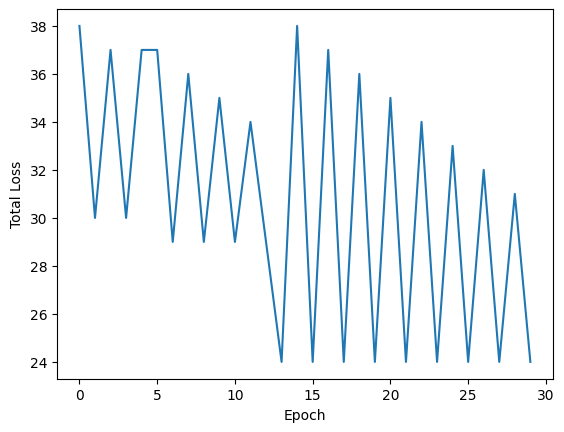

In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

**SOLUTIONS**

**1**

In [12]:

import pandas as pd
path = "/content/Sonar.csv"

df = pd.read_csv(path)
print(df.shape)
df.head()

(208, 61)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [13]:
df["Class"].value_counts()

0    111
1     97
Name: Class, dtype: int64

In [14]:
feature = np.array(df.drop("Class", axis=1))
label = np.array(df["Class"])

array([0.02  , 0.0371, 0.0428, 0.0207, 0.0954, 0.0986, 0.1539, 0.1601,
       0.3109, 0.2111, 0.1609, 0.1582, 0.2238, 0.0645, 0.066 , 0.2273,
       0.31  , 0.2999, 0.5078, 0.4797, 0.5783, 0.5071, 0.4328, 0.555 ,
       0.6711, 0.6415, 0.7104, 0.808 , 0.6791, 0.3857, 0.1307, 0.2604,
       0.5121, 0.7547, 0.8537, 0.8507, 0.6692, 0.6097, 0.4943, 0.2744,
       0.051 , 0.2834, 0.2825, 0.4256, 0.2641, 0.1386, 0.1051, 0.1343,
       0.0383, 0.0324, 0.0232, 0.0027, 0.0065, 0.0159, 0.0072, 0.0167,
       0.018 , 0.0084, 0.009 , 0.0032])

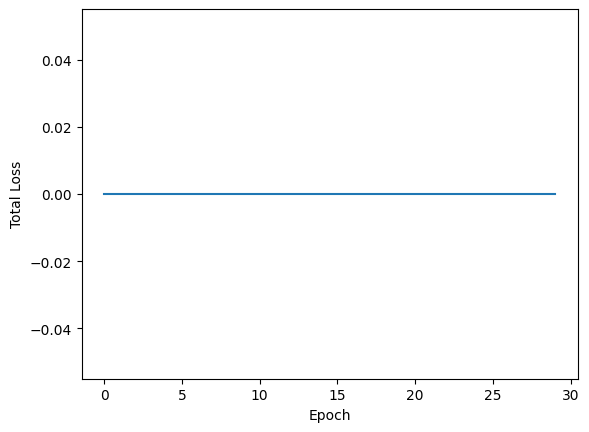

In [15]:
perceptron_algo_plot(feature, label)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature = scaler.fit_transform(feature)

array([-19.60484729,  -5.96745327,   8.50761424, -10.34573996,
        -2.12041402,  -1.29495728,  18.42795583,  12.46802106,
        -9.94707531,  -0.32461515, -14.61775341, -14.49837687,
        -2.42906641,   1.30969742,   6.28701936,   7.70363241,
         3.88101068,   0.55516798,   2.09976656,   1.88452365,
        -3.01928279,   0.2555165 ,  -0.95513023,  -5.46031801,
        -7.03593479, -10.52815224,  -5.57062875,  -4.63109369,
        -3.47037836,  -5.59353247,   5.41538781,  -3.42890618,
        -4.56490437,   2.20742841,   2.59922219,   9.71841734,
        11.36119595,   2.6335206 ,  -7.07185334,  14.19631853,
         4.14414123,   0.57489905,  -3.26914326,  -3.69989057,
       -15.25057106,  -3.87029203,   3.88707008, -14.0364575 ,
       -16.71212629,   6.07381784, -16.50045292, -11.39393261,
         0.13085183, -14.75603265,   3.76778366,  -1.53624557,
        -3.53539909,   0.15091382,  -2.7136364 ,  -8.13524965])

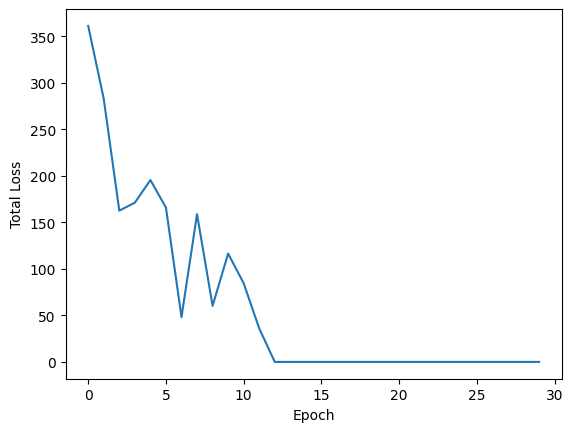

In [17]:
perceptron_algo_plot(feature, label)

**2.**Changing the learning rate can indeed have a significant impact on the convergence of the Perceptron algorithm. Here's how different learning rates can affect the convergence:

Small Learning Rate: With a small learning rate, the algorithm makes tiny adjustments to the weight vector in each iteration. While this can lead to a stable convergence, it may require a large number of iterations to reach a solution, especially if the data is noisy or not linearly separable.

Moderate Learning Rate: A moderate learning rate allows for more substantial weight updates in each iteration. It often converges faster than a small learning rate, but it might still require a considerable number of iterations in some cases.

Large Learning Rate: A large learning rate leads to significant weight updates in each iteration. While this can make the algorithm converge quickly, it may also cause overshooting and divergence, especially if the data is noisy. In some cases, it may not converge at all and bounce around without reaching a stable solution.

**3.**

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a non-linearly separable dataset
np.random.seed(0)
X = np.random.randn(100, 2)  # 100 data points with 2 features

# Define labels: Class 0 and Class 1
y = np.where(X[:, 0]**2 + X[:, 1]**2 < 1.5, -1, 1)


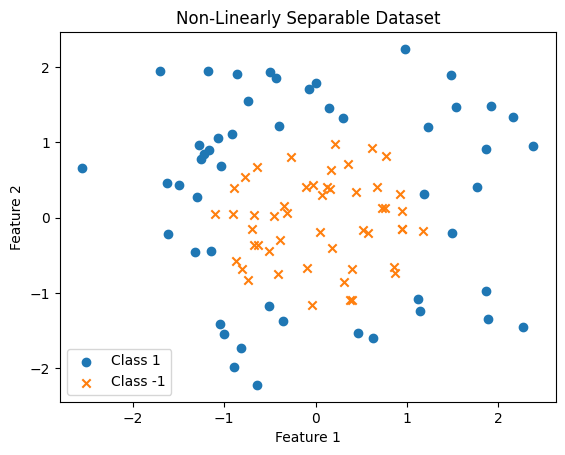

In [25]:
# Plot the dataset
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', marker='o')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], label='Class -1', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Non-Linearly Separable Dataset')
plt.show()

Learned Weight Vector: [1.52413586 1.88149639]


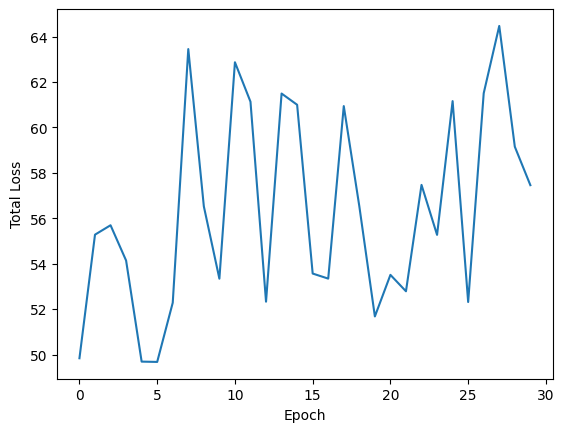

In [23]:
# Use the Perceptron algorithm on the non-linearly separable dataset
learned_weights = perceptron_algo_plot(X, y)
print("Learned Weight Vector:", learned_weights)



**4.**In the Perceptron learning algorithm, the bias term (also known as the bias unit or bias weight) is added to each data sample as an additional feature. It serves several important purposes and has a significant influence on the decision boundary and the overall classification process.

The bias term allows the Perceptron to learn an intercept or bias for the decision boundary.The bias term shifts the decision boundary away from the origin, enabling the algorithm to model data with non-zero intercepts.

The bias term accounts for the offsets, making the Perceptron more flexible in capturing the relationships between features and labels.

By allowing the decision boundary to have an intercept, the bias term increases the model's flexibility.

**5.**



A larger learning rate typically results in faster convergence, but it can be less stable. A smaller learning rate is slower but more stable.

Smaller learning rates are less likely to lead to divergence or overshooting, making them more stable. Larger learning rates can lead to instability if not carefully chosen.